# Semantic Emotional Representation of Emojis

#### Imports and loads

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib, mplcairo
import pickle

matplotlib.use("module://mplcairo.macosx")
#print('Backend is now ' + matplotlib.get_backend())

In [2]:
path_root = "/Users/atanaltay/Documents/Research/inwork/marketing_emotions/codes/data/all_marketing_data/"
groupsAndCountsPath = path_root + "emoticon_analysis/tr_emoticon_groups_and_counts.csv"
groupsAndCountsDfEn = pd.read_csv(path_root + "emoticon_analysis/en_emoticon_groups_and_counts.csv")
groupsAndCountsDfTr = pd.read_csv(groupsAndCountsPath)
groupsAndCountsDfTr.emoticon = groupsAndCountsDfTr.emoticon.str.strip('_')
groupsAndCountsDfEn.emoticon = groupsAndCountsDfEn.emoticon.str.strip('_')


#importance_df_en = pd.read_csv(path_root +"selected_emoticons/en90/relevance_en.csv",index_col="idx")
#importance_df_tr = pd.read_csv(path_root +"selected_emoticons/tr90/relevance_tr.csv",index_col="idx")
cofreqs_en = pd.read_csv(path_root+"selected_emoticons/en90/cofreq_en.csv",index_col="idx")
cofreqs_tr = pd.read_csv(path_root+"selected_emoticons/tr90/cofreq_tr.csv",index_col="idx")

#Turkish
tr_anger_seeds = pickle.load( open( path_root + "seeds/tr90/anger", "rb" ) )
tr_happy_seeds = pickle.load( open( path_root + "seeds/tr90/happy", "rb" ) )
tr_sad_seeds = pickle.load( open( path_root + "seeds/tr90/sad", "rb" ) )
tr_fear_seeds = pickle.load( open( path_root + "seeds/tr90/fear", "rb" ) )
tr_surprise_seeds = pickle.load( open( path_root + "seeds/tr90/surprise", "rb" ) )
tr_disgust_seeds = pickle.load( open( path_root + "seeds/tr90/disgust", "rb" ) )
tr_seeds_dict = {"anger":tr_anger_seeds,"happy":tr_happy_seeds,"sad":tr_sad_seeds,"fear":tr_fear_seeds,"surprise":tr_surprise_seeds,"disgust":tr_disgust_seeds}


en_anger_seeds = pickle.load( open( path_root + "seeds/en90/anger", "rb" ))
en_happy_seeds = pickle.load( open( path_root + "seeds/en90/happy", "rb" ))
en_sad_seeds = pickle.load( open( path_root + "seeds/en90/sad", "rb" ) )
en_fear_seeds = pickle.load( open( path_root + "seeds/en90/fear", "rb" ) )
en_surprise_seeds = pickle.load( open( path_root + "seeds/en90/surprise", "rb" ) )
en_disgust_seeds = pickle.load( open( path_root + "seeds/en90/disgust", "rb" ) )
en_seeds_dict = {"anger":en_anger_seeds,"happy":en_happy_seeds,"sad":en_sad_seeds,"fear":en_fear_seeds,"surprise":en_surprise_seeds,"disgust":en_disgust_seeds}

tr_emos = groupsAndCountsDfTr
tr_emos.emoticon = tr_emos.emoticon.str.strip("_")
tr_emos.index =tr_emos.emoticon

cscPathTr = path_root + "emoticon_analysis/count_matrices/tr/csc_count.npz"
featuresPathTr = path_root + "emoticon_analysis/count_matrices/tr/feature_names.npy"

cscPathEn = path_root + "emoticon_analysis/count_matrices/en/csc_count.npz"
featuresPathEn = path_root + "emoticon_analysis/count_matrices/en/feature_names.npy"

cscCountsMatrixTr = scipy.sparse.load_npz(cscPathTr)
featureNamesArrayTr = np.load(featuresPathTr,allow_pickle=True)

cscCountsMatrixEn = scipy.sparse.load_npz(cscPathEn)
featureNamesArrayEn = np.load(featuresPathEn,allow_pickle=True)

emojisPath = path_root + "emoticon_analysis/emojis.csv"
path_in = path_root+ "tr_emoanalysis.parquet"
path_in_en= path_root + "en_emoanalysis.parquet"

dfTr = pd.read_parquet(path_in,columns=["id","created_at","company","type","industry","gender",'text_stemmed'])
dfEn = pd.read_parquet(path_in_en,columns=["id","created_at","company","type","industry","gender",'text_stemmed'])


#### Importance and probability calculation

Turkish

In [3]:
#importance calculation
#importance calculation, burada yanızca probability hesabı vr, ancak gelen nesneler uyumlu gelmiyor, bu nedenle
# log(freq) ile çarpmak gerekiyor

#Only probabilities:
all_sum = cofreqs_tr.sum(axis=1)
importance_df_tr = pd.DataFrame(index=cofreqs_tr.index)
#importance_df_tr = importance_df.join(tr_emos['count'])

for key, seeds in tr_seeds_dict.items():
    emotion_sum = cofreqs_tr.loc[:,seeds].sum(axis=1)
    sub_score = emotion_sum/all_sum
    #emotion_score = sub_score*np.log10(groupsAndCountsDfTr['cnt'])
    df_emotion_sum = pd.DataFrame(sub_score,columns=[key])
    #df_emotion_sum = pd.DataFrame(emotion_score,columns=[key])
    importance_df_tr = importance_df_tr.join(df_emotion_sum,how='left')

In [4]:
#importance calculation, burada yanızca probability hesabı vr, ancak gelen nesneler uyumlu gelmiyor, bu nedenle
# log(freq) ile çarpmak gerekiyor
all_sum = cofreqs_tr.sum(axis=1)
importance_df_tr = pd.DataFrame(index=cofreqs_tr.index)
#importance_df_tr = importance_df.join(tr_emos['count'])

for key, seeds in tr_seeds_dict.items():
    emotion_sum = cofreqs_tr.loc[:,seeds].sum(axis=1)
    sub_score = emotion_sum/all_sum
    emotion_score = sub_score*np.log10(tr_emos['cnt'])
    #df_emotion_sum = pd.DataFrame(sub_score,columns=[key])
    df_emotion_sum = pd.DataFrame(emotion_score,columns=[key])
    importance_df_tr = importance_df_tr.join(df_emotion_sum,how='left')

In [5]:

importance_df_tr_merged = importance_df_tr.merge(tr_emos,left_index=True,right_index=True,how='left')
#most_popular =importance_df_tr_merged.sort_values(by='cnt',ascending=False)[['anger','happy','disgust','sad','fear','surprise','emoji','cnt']][0:200]

most_popular =importance_df_tr_merged.sort_values(by='cnt',ascending=False)[0:200]
most_popular = most_popular.dropna()
#most_popular["emotion"] = most_popular[['anger','happy','disgust','sad','fear','surprise']].idxmax(axis=1)

English

In [8]:
en_emos = groupsAndCountsDfEn
en_emos.emoticon = en_emos.emoticon.str.strip("_")
en_emos.index =en_emos.emoticon



#Only probabilities:
all_sum = cofreqs_en.sum(axis=1)
importance_df_en = pd.DataFrame(index=cofreqs_en.index)
#importance_df_tr = importance_df.join(tr_emos['count'])

for key, seeds in en_seeds_dict.items():
    emotion_sum = cofreqs_en.loc[:,seeds].sum(axis=1)
    sub_score = emotion_sum/all_sum
    #emotion_score = sub_score*np.log10(groupsAndCountsDfEn['cnt'])
    #df_emotion_sum = pd.DataFrame(emotion_sum,columns=[key])
    df_emotion_sum = pd.DataFrame(sub_score,columns=[key])
    importance_df_en = importance_df_en.join(df_emotion_sum,how='left')


importance_df_en_merged = importance_df_en.merge(en_emos,left_index=True,right_index=True,how='left')
most_popular_en =importance_df_en_merged.sort_values(by='cnt',ascending=False)[0:200]
most_popular_en = most_popular_en.dropna()


#### Check distances

In [9]:
diff_tr = most_popular.index.difference(most_popular_en.index)
diff_en = most_popular_en.index.difference(most_popular.index)
common_idx = most_popular_en.index.intersection(most_popular.index)

data_en_common = most_popular_en.loc[common_idx,:]
data_tr_common = most_popular.loc[common_idx,:]

In [29]:

np.save("/Users/atanaltay/Documents/Research/inwork/marketing_emotions/codes/data/all_marketing_data/emoticon_analysis/count_matrices/2022_withseeds/common_idx.npy",common_idx)



Turkish different

In [7]:
most_popular.loc[diff_tr].merge(tr_emos,left_index=True,right_index=True,how='left').group_y.value_counts()

People & Body        15
Objects              11
Animals & Nature     10
Smileys & Emotion     9
Activities            5
Symbols               4
Travel & Places       4
Flags                 1
Food & Drink          1
Name: group_y, dtype: int64

In [40]:
most_popular_en.loc[diff_en].merge(en_emos,left_index=True,right_index=True,how='left').group_y.value_counts()

People & Body        16
Smileys & Emotion    10
Objects               6
Food & Drink          4
Animals & Nature      2
Symbols               2
Activities            1
Travel & Places       1
Name: group_y, dtype: int64

In [10]:
from scipy.spatial import distance
raw_distances = distance.cdist(data_en_common[['anger','happy','disgust','sad','fear','surprise']], data_tr_common[['anger','happy','disgust','sad','fear','surprise']], metric='jensenshannon')

In [11]:
distance_mtrx = pd.DataFrame(raw_distances,index=common_idx,columns=common_idx)

In [12]:
distance_mtrx.merge(tr_emos,left_index=True,right_index=True,how='left')

,red_heart,loudly_crying_face,face_with_tears_of_joy,smiling_face_with_smiling_eyes,purple_heart,thumbs_up,backhand_index_pointing_down,eyes,pouting_face,waving_hand,...,trophy,dog_face,nerd_face,television,emoticon,cnt,emoji,name,group,sub_group
idx,,,,,,,,,,,,,,,,,,,,,
red_heart,0.375794,0.405201,0.424760,0.266517,0.303793,0.342978,0.326120,0.352567,0.458573,0.415858,...,0.265614,0.402102,0.452171,0.368052,red_heart,12140,❤️,red heart,Smileys & Emotion,emotion
loudly_crying_face,0.219676,0.172014,0.190469,0.234533,0.189650,0.194182,0.185788,0.174128,0.257816,0.186623,...,0.242906,0.431728,0.232200,0.199980,loudly_crying_face,2599,😭,loudly crying face,Smileys & Emotion,face-concerned
face_with_tears_of_joy,0.166346,0.232603,0.228156,0.199633,0.207311,0.196896,0.248744,0.189734,0.292874,0.255951,...,0.115794,0.332490,0.263300,0.207273,face_with_tears_of_joy,11006,😂,face with tears of joy,Smileys & Emotion,face-smiling
smiling_face_with_smiling_eyes,0.354255,0.386448,0.413194,0.275925,0.284712,0.324838,0.309588,0.333067,0.443475,0.400420,...,0.252342,0.368672,0.435363,0.348646,smiling_face_with_smiling_eyes,12417,😊,smiling face with smiling eyes,Smileys & Emotion,face-smiling
purple_heart,0.415060,0.450578,0.467994,0.317318,0.346529,0.389478,0.371013,0.398706,0.497290,0.459060,...,0.308630,0.413815,0.496146,0.413595,purple_heart,6466,💜,purple heart,Smileys & Emotion,emotion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
raised_hand,0.195656,0.251797,0.237555,0.266143,0.157097,0.203476,0.224951,0.201601,0.266929,0.250536,...,0.151845,0.313240,0.286027,0.217016,raised_hand,174,✋,raised hand,People & Body,hand-fingers-open
trophy,0.241584,0.264059,0.285938,0.160178,0.178246,0.199941,0.211199,0.206830,0.334019,0.283804,...,0.128555,0.347664,0.312109,0.224928,trophy,556,🏆,trophy,Activities,award-medal
dog_face,0.313535,0.326198,0.360920,0.223756,0.234328,0.268417,0.247288,0.275825,0.396864,0.343885,...,0.222068,0.374274,0.379762,0.292852,dog_face,1039,🐶,dog face,Animals & Nature,animal-mammal


In [13]:
df_distances = pd.DataFrame(np.diagonal(distance_mtrx),index=common_idx).sort_values(by=0,ascending=False)

In [29]:
#df_distances.merge(en_emos,left_index=True,right_index=True,how='left').rename(columns={0:'distance'})

In [15]:
final_distance_data = df_distances.merge(tr_emos,left_index=True,right_index=True,how='left')\
.merge(most_popular,left_index=True,right_index=True,how='left')\
.merge(most_popular_en,left_index=True,right_index=True,how='left',suffixes=('_tr', '_en'))

final_distance_data.rename(columns={0:'distance'},inplace=True)

In [16]:
final_distance_data.sort_values(by='distance',ascending=True)[0:5]

,distance,emoticon_x,cnt_x,emoji_x,name_x,group_x,sub_group_x,anger_tr,happy_tr,sad_tr,...,sad_en,fear_en,surprise_en,disgust_en,emoticon,cnt,emoji,name,group,sub_group
idx,,,,,,,,,,,,,,,,,,,,,
flexed_biceps,0.124392,flexed_biceps,1024,💪,flexed biceps,People & Body,body-parts,0.230624,1.836862,0.481567,...,0.064319,0.065850,0.073507,0.015314,flexed_biceps,5489,💪,flexed biceps,People & Body,body-parts
worried_face,0.127531,worried_face,157,😟,worried face,Smileys & Emotion,face-concerned,0.367870,0.707442,0.384848,...,0.210843,0.078313,0.116466,0.034137,worried_face,3517,😟,worried face,Smileys & Emotion,face-concerned
trophy,0.128555,trophy,556,🏆,trophy,Activities,award-medal,0.129124,1.606873,0.086082,...,0.056380,0.103858,0.056380,0.038576,trophy,1639,🏆,trophy,Activities,award-medal
persevering_face,0.129940,persevering_face,229,😣,persevering face,Smileys & Emotion,face-concerned,0.339976,0.795945,0.395972,...,0.186869,0.214646,0.027778,0.113636,persevering_face,3179,😣,persevering face,Smileys & Emotion,face-concerned
broken_heart,0.139854,broken_heart,340,💔,broken heart,Smileys & Emotion,emotion,0.455004,0.864508,0.459141,...,0.287850,0.131308,0.032710,0.093458,broken_heart,12341,💔,broken heart,Smileys & Emotion,emotion


In [15]:
final_distance_data.distance.hist(bins=50)

<AxesSubplot:>

2024-11-13 15:14:19.443 python[64914:1811237] +[IMKClient subclass]: chose IMKClient_Modern
2024-11-13 15:14:19.443 python[64914:1811237] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [25]:
#groups = {'Turkish':["anger_tr", "happy_tr", "disgust_tr", "sad_tr","fear_tr","surprise_tr"],'English':["anger_en", "happy_en", "disgust_en", "sad_en","fear_en","surprise_en"]}

In [15]:
dataToSave = final_distance_data[['distance','emoji_x','group_x','sub_group_x','anger_tr','happy_tr','disgust_tr','sad_tr','fear_tr','surprise_tr','anger_en','happy_en','disgust_en','sad_en','fear_en','surprise_en',]]

In [16]:
dataToSave.to_excel('/Users/atanaltay/Desktop/distdata.xlsx')

In [15]:
dataToSave

,distance,emoji_x,group_x,sub_group_x,anger_tr,happy_tr,disgust_tr,sad_tr,fear_tr,surprise_tr,anger_en,happy_en,disgust_en,sad_en,fear_en,surprise_en
idx,,,,,,,,,,,,,,,,
woman_shrugging,0.635777,🤷‍♀️,People & Body,person-gesture,0.172414,0.318966,0.037356,0.129310,0.221264,0.120690,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
backhand_index_pointing_down,0.622135,👇,People & Body,hand-single-finger,0.161018,0.476717,0.013276,0.128331,0.110832,0.109826,0.007315,0.040830,0.006465,0.007826,0.015481,0.922082
right_arrow,0.515574,➡️,Symbols,arrow,0.158983,0.378378,0.074722,0.100159,0.138315,0.149444,0.481818,0.027273,0.000000,0.009091,0.004545,0.477273
backhand_index_pointing_left,0.509530,👈,People & Body,hand-single-finger,0.190813,0.325088,0.038869,0.130742,0.215548,0.098940,0.869452,0.078329,0.009138,0.010444,0.023499,0.009138
down_arrow,0.479378,⬇️,Symbols,arrow,0.306792,0.323185,0.072600,0.084309,0.117096,0.096019,0.000000,0.709677,0.000000,0.000000,0.032258,0.258065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
broken_heart,0.139854,💔,Smileys & Emotion,emotion,0.179739,0.341503,0.049020,0.181373,0.151961,0.096405,0.143925,0.310748,0.093458,0.287850,0.131308,0.032710
persevering_face,0.129940,😣,Smileys & Emotion,face-concerned,0.144068,0.337288,0.052542,0.167797,0.203390,0.094915,0.111111,0.345960,0.113636,0.186869,0.214646,0.027778
trophy,0.128555,🏆,Activities,award-medal,0.047038,0.585366,0.107433,0.031359,0.132985,0.095819,0.041543,0.703264,0.038576,0.056380,0.103858,0.056380


#### Load distance, distance distributions

In [17]:
sentiments_ = pd.read_excel('/Users/atanaltay/Documents/Research/inwork/marketing_emotions/codes/data/all_marketing_data/emoticon_analysis/distdata.xlsx')
sentiments_.index = sentiments_.idx
final_distance_data = df_distances.merge(sentiments_.sentiment,left_index=True,right_index=True,how='left')
final_distance_data.rename(columns={'0':'distance'},inplace=True)

In [18]:
dfff = pd.read_excel('/Users/atanaltay/Documents/Research/inwork/marketing_emotions/codes/data/all_marketing_data/emoticon_analysis/distdata copy.xlsx')

In [7]:
dfff.sentiment.value_counts()

 1    71
-1    42
 0    14
Name: sentiment, dtype: int64

In [31]:
dfff.head()

,idx,distance,emoji_x,sentiment,group_x,sub_group_x,anger_tr,happy_tr,disgust_tr,sad_tr,fear_tr,surprise_tr,anger_en,happy_en,disgust_en,sad_en,fear_en,surprise_en
0,woman_shrugging,0.635777,🤷‍♀️,0,People & Body,person-gesture,0.172414,0.318966,0.037356,0.129310,0.221264,0.120690,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1,backhand_index_pointing_down,0.622135,👇,0,People & Body,hand-single-finger,0.161018,0.476717,0.013276,0.128331,0.110832,0.109826,0.007315,0.040830,0.006465,0.007826,0.015481,0.922082
2,right_arrow,0.515574,➡️,0,Symbols,arrow,0.158983,0.378378,0.074722,0.100159,0.138315,0.149444,0.481818,0.027273,0.000000,0.009091,0.004545,0.477273
3,backhand_index_pointing_left,0.509530,👈,0,People & Body,hand-single-finger,0.190813,0.325088,0.038869,0.130742,0.215548,0.098940,0.869452,0.078329,0.009138,0.010444,0.023499,0.009138
4,down_arrow,0.479378,⬇️,0,Symbols,arrow,0.306792,0.323185,0.072600,0.084309,0.117096,0.096019,0.000000,0.709677,0.000000,0.000000,0.032258,0.258065


In [15]:
plt.scatter(dfff.sentiment,dfff.distance,c=dfff.sentiment)

2024-11-13 16:41:05.674 python[74293:1874110] +[IMKClient subclass]: chose IMKClient_Modern
2024-11-13 16:41:05.674 python[74293:1874110] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [16]:
fig, ax = plt.subplots(nrows=1,ncols=2,gridspec_kw={'width_ratios': [5, 3]},figsize=(10,4))
fig.set_dpi(300)
sns.set_style("whitegrid")
#fig = sns.displot(dfff,x='distance',hue='sentiment',kind="kde",fill=True)
negativeDist = dfff[dfff.sentiment==-1]['distance']
positiveDist = dfff[dfff.sentiment==1]['distance']
neutralDist = dfff[dfff.sentiment==0]['distance']

dfff['sent'] = np.where(dfff.sentiment==-1,'Negative',np.where(dfff.sentiment==1,'Positive','Neutral'))

# plotting both distibutions on the same figure
#sns.kdeplot(data=dfff, x='distance', shade=True, ax=ax[0],hue='sent',)
sns.kdeplot(negativeDist, shade=True, color="r",label="Negative",ax=ax[0])
sns.kdeplot(neutralDist, shade=True, color="b",label="Neutral",ax=ax[0])
sns.kdeplot(positiveDist, shade=True, color="g",label="Positive",ax=ax[0])
#sns.histplot(data=dfff, x="distance", kde=True, stat="probability", color="r",
#             binwidth=5, ax=ax[0],hue='sent')
ax[0].set_ylabel("Frequency")
ax[0].set_xlabel("Distance")
ax[0].legend()
ax[1].boxplot([negativeDist,neutralDist,positiveDist],labels=['Negative','Neutral','Positive'],widths=0.7,showmeans=True)
ax[1].set_ylabel("Distance")
#plt.ylabel("Frequency")
plt.tight_layout()
#plt.legend()
plt.show()


In [48]:
dfff.groupby('sentiment')[['distance']].agg(['mean','std'])

distance          
               mean       std
sentiment                    
-1         0.208415  0.049637
 0         0.360189  0.152578
 1         0.288231  0.065615

In [19]:
expdata = dfff[['distance','sentiment']]
expdata['negative'] = np.where(expdata.sentiment==1,1,0)
expdata['positive'] = np.where(expdata.sentiment==-1,1,0)

/Users/atanaltay/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/atanaltay/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [8]:
results = smf.ols('distance ~ negative+positive', data=expdata).fit()

In [9]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               distance   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     27.31
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           1.49e-10
Time:                        17:36:53   Log-Likelihood:                 147.16
No. Observations:                 127   AIC:                            -288.3
Df Residuals:                     124   BIC:                            -279.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3699      0.021     18.005      0.0


#### results - distance
- Mean dissimilarly of neutral emoticons is the highest hwen their usage with emotional words is concerned, and their distance is the most spread one. However, there are only 12 common emoticons preferred neutrally.
-  On the other hand, emoticons with negative sentiment are more similarly used , whereas emoticons with positive sentiment are more dissimilarly used with emotional words. 

- all coefficients are significant

In [39]:
expdata.groupby(by="sentiment").mean()

,distance,negative,positive
sentiment,,,
-1,0.208415,0.0,1.0
0,0.369857,0.0,0.0
1,0.288351,1.0,0.0


In [ ]:
#Most dissimilar 20

dfff[0:20][['distance','emoji_x']]

In [40]:
#most similar 20


dfff.sort_values(by='distance',ascending=True)[0:20][['distance','emoji_x']]

,distance,emoji_x
126,0.124392,💪
125,0.127531,😟
124,0.128555,🏆
123,0.129940,😣
122,0.139854,💔
121,0.141093,🚀
120,0.143204,😫
119,0.146226,😬
118,0.148784,😞
117,0.154282,📺


##### Plotting distance

In [12]:
dfff.head(2)

,idx,distance,emoji_x,sentiment,category,group_x,sub_group_x,anger_tr,happy_tr,disgust_tr,...,fear_tr,surprise_tr,dist_tr,dist_en,anger_en,happy_en,disgust_en,sad_en,fear_en,surprise_en
0,woman_shrugging,0.635777,🤷‍♀️,0,emotion,People & Body,person-gesture,0.172414,0.318966,0.037356,...,0.221264,0.120690,NaN,NaN,0.172414,0.00000,0.000000,0.000000,1.000000,0.000000
1,backhand_index_pointing_down,0.622135,👇,0,hand,People & Body,hand-single-finger,0.161018,0.476717,0.013276,...,0.110832,0.109826,NaN,NaN,0.161018,0.04083,0.006465,0.007826,0.015481,0.922082


In [20]:
from matplotlib.font_manager import FontProperties
import mplcairo
#print('Default backend: ' + matplotlib.get_backend()) 
matplotlib.use("module://mplcairo.macosx")
#print('Backend is now ' + matplotlib.get_backend())

In [21]:
maxdfToPlotTr = dfff[['happy_tr','surprise_tr','distance','emoji_x','anger_tr',  'disgust_tr', 'sad_tr', 'fear_tr','sentiment']]
maxdfToPlotTr.index = maxdfToPlotTr.emoji_x
maxdfToPlotTr.drop(columns=['emoji_x'],inplace=True)
maxdfToPlotTr.columns = maxdfToPlotTr.columns.str.replace('_tr','')

maxdfToPlotEn = dfff[['happy_en','surprise_en','distance','emoji_x','anger_en',  'disgust_en', 'sad_en', 'fear_en','sentiment']]
maxdfToPlotEn.index = maxdfToPlotEn.emoji_x
maxdfToPlotEn.drop(columns=['emoji_x'],inplace=True)
maxdfToPlotEn.columns = maxdfToPlotEn.columns.str.replace('_en','')

/Users/atanaltay/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
maxdfToPlotEn.columns

Index(['happy', 'surprise', 'distance', 'anger', 'disgust', 'sad', 'fear',
       'sentiment'],
      dtype='object')

In [ ]:
maxdfToPlotTr[0:25][['happy', 'surprise','anger', 'disgust', 'sad', 'fear']]

In [30]:
#PLOTTER
# External plot olarak açılıyor

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib,mplcairo
import pickle

from matplotlib.font_manager import FontProperties
matplotlib.use("module://mplcairo.macosx")
#sns.set_style("whitegrid")
#sns.reset_orig()
sns.color_palette("deep")
dfff = pd.read_excel('/Users/atanaltay/Documents/Research/inwork/marketing_emotions/codes/data/all_marketing_data/emoticon_analysis/distdata.xlsx')

maxdfToPlotTr = dfff[['happy_tr','surprise_tr','distance','emoji_x','anger_tr',  'disgust_tr', 'sad_tr', 'fear_tr','sentiment']]
maxdfToPlotTr.index = maxdfToPlotTr.emoji_x
maxdfToPlotTr.drop(columns=['emoji_x'],inplace=True)
maxdfToPlotTr.columns = maxdfToPlotTr.columns.str.replace('_tr','')

maxdfToPlotEn = dfff[['happy_en','surprise_en','distance','emoji_x','anger_en',  'disgust_en', 'sad_en', 'fear_en','sentiment']]
maxdfToPlotEn.index = maxdfToPlotEn.emoji_x
maxdfToPlotEn.drop(columns=['emoji_x'],inplace=True)
maxdfToPlotEn.columns = maxdfToPlotEn.columns.str.replace('_en','')


#fig,ax = plt.subplots(nrows=3,ncols=1, figsize=(14,12),sharex=True)
fig,ax = plt.subplots(nrows=3,ncols=1, figsize=(10,6),sharex=True)
fig.set_dpi(300)
# Load Apple Color Emoji font 
#fig.suptitle('Semantic Distribution of Emotions')
prop = FontProperties(fname='/System/Library/Fonts/Apple Color Emoji.ttc',size=8)
plt.rcParams.update({'font.size': 10})

ax[0].set_ylabel('Turkish')

ax[1].set_ylabel('English')


trToPlot = maxdfToPlotTr[['happy', 'surprise','anger', 'disgust', 'sad', 'fear']]
trToPlot.plot.bar(stacked=True,ax=ax[0])
ax[0].legend(loc='upper right',fontsize=8)


enToPlot = maxdfToPlotEn[['happy', 'surprise','anger', 'disgust', 'sad', 'fear']]
enToPlot.plot.bar(stacked=True,ax=ax[1])
ax[1].legend(loc='upper right',fontsize=8)

# Create an array with the colors you want to use
sns.barplot(data=maxdfToPlotTr,x=maxdfToPlotTr.index,y="distance",ax=ax[2],hue='sentiment',hue_order=[1,-1,0],)
ax[2].set_xticklabels(labels=maxdfToPlotTr.index.tolist(),fontproperties=prop)
ax[2].set_ylabel('Distance')
ax[2].set_xlabel('')
handles, labels = ax[2].get_legend_handles_labels()
ax[2].legend(loc='upper right',handles=handles,labels=["positive","negative","neutral"],fontsize=8)
ax[2].grid(axis="y")
plt.savefig('/Users/atanaltay/Desktop/figure2.png', dpi=fig.dpi)
plt.show()
labels

/Users/atanaltay/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


['1', '-1', '0']

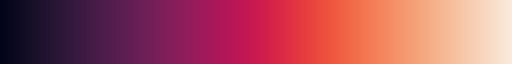